### Úloha 13.1

Načítajte dataset Wines z dvoch súborov a integrujte ho do jedného dátového rámca.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
red = pd.read_csv('../data/winequality_red.csv') # nacitame prvy subor do datoveho ramca red
white = pd.read_csv('../data/winequality_white.csv') # nacitame druhy subor do datoveho ramca white

wines = pd.concat([red, white]) # vytvorime datovy ramec wines spojenim datovych ramcov red a white

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Úloha 13.2

Predspracujte dátový rámec Wines vhodným spôsobom pre účely zhlukovania dát

In [3]:
from sklearn.preprocessing import MinMaxScaler
wines = wines.drop(['quality'], axis=1)

scaler = MinMaxScaler()
scaler.fit(wines)
wines_norm = pd.DataFrame(scaler.fit_transform(wines), index=wines.index, columns=wines.columns)
wines_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899


### Úloha 13.3

Skúste vytvoriť zhlukovací model K-Means a nájdite najvhodnejší počet zhlukov pre model. 

In [4]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, max_iter=500)
model.fit(wines_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
Sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(wines_norm)
    Sum_of_squared_distances.append(km.inertia_)
    
print(Sum_of_squared_distances)

[756.1775002318875, 591.5970915523437, 461.1624606665552, 413.0710563586897, 376.4387680469039, 350.1243076143691, 334.1630340525841, 320.5419914247169, 308.3693938456093, 296.88039216971015, 288.65518731992944, 280.7312075230431, 271.3880345681488, 266.2353957938614]


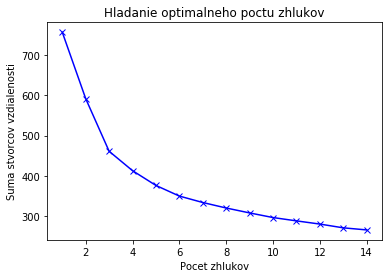

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Pocet zhlukov')
plt.ylabel('Suma stvorcov vzdialenosti')
plt.title('Hladanie optimalneho poctu zhlukov')
plt.show()

### Úloha 13.4

Preskúmajte jednotlivé zhluky pre najlepší model - vypíšte centroidy a vypočítajte vájomné vzdialenosti. Pozrite sa na príklady priradené do jednotlivých zhlukov a skúste zhluky porovnať z hľadiska hodnôt jednotlivých atribútov.

In [39]:
# natrénujeme model so zvoleným počtom zhlukov

model = KMeans(n_clusters=8)
model = model.fit(wines_norm)
y_kmeans = model.predict(wines_norm)

In [40]:
# teraz za pozrieme na centroidy jednotlivých zhlukov a vypíšeme ich:

centers = model.cluster_centers_ 
print("Vsetky centroidy:") 
print(centers)

Vsetky centroidy:
[[0.23628398 0.15730559 0.19853785 0.04889833 0.04580933 0.09668979
  0.2316766  0.07051087 0.38119497 0.15191307 0.652875  ]
 [0.21373243 0.1098688  0.1914892  0.04196191 0.05552831 0.10792077
  0.27260785 0.11203356 0.51015952 0.1778888  0.41139395]
 [0.33033476 0.34719569 0.11088737 0.02952131 0.12515631 0.05598714
  0.12196124 0.18810125 0.45549168 0.20501673 0.24132877]
 [0.23971137 0.13246475 0.17373045 0.09342723 0.07584139 0.12433904
  0.33345419 0.15654969 0.39083015 0.1492709  0.23922444]
 [0.52800185 0.21333333 0.28732896 0.03272749 0.15051956 0.04189538
  0.06943716 0.20481959 0.36502189 0.29814528 0.38365781]
 [0.27317554 0.13722222 0.24110644 0.18332834 0.0739776  0.16362419
  0.40003772 0.20549468 0.2913322  0.15803471 0.17606409]
 [0.29571809 0.11460889 0.21283185 0.05932611 0.05381769 0.09676918
  0.25726132 0.10975185 0.27789226 0.1402908  0.42377781]
 [0.24048353 0.37090547 0.05619493 0.02742194 0.10802301 0.05052861
  0.07199257 0.15563075 0.590813

In [41]:
# pozrieme sa na príklady patriace jednotlivým zhlukom a spočítame popisné charakteristiky pre príklady z jednotlivých zhlukov

for x in range(0, 9):
    globals()['cluster_%s' % x] = np.where(model.labels_==x)
    globals()['data_cluster_%s' % x] = wines.iloc[globals()['cluster_%s' % x]]
    

In [42]:
data_cluster_0.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,6.659036,0.315958,0.329573,3.788171,0.036577,28.846659,106.547645,0.990767,3.211742,0.490405,12.504838
std,0.830004,0.100922,0.115341,3.015586,0.014978,12.587110,34.358887,0.001612,0.126853,0.142569,0.493613
min,3.900000,0.080000,0.000000,0.700000,0.009000,3.000000,7.000000,0.987110,2.820000,0.220000,11.300000
25%,6.100000,0.240000,0.280000,1.700000,0.029000,20.000000,88.000000,0.989620,3.130000,0.380000,12.200000
50%,6.600000,0.300000,0.320000,2.600000,0.034000,29.000000,107.000000,0.990520,3.220000,0.460000,12.500000
75%,7.100000,0.370000,0.370000,4.900000,0.039000,37.000000,126.000000,0.991600,3.290000,0.570000,12.800000
max,9.600000,0.780000,1.660000,22.600000,0.230000,75.000000,294.000000,0.997700,3.590000,1.080000,14.200000


In [43]:
data_cluster_1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,6.386162,0.244803,0.317872,3.335916,0.042428,32.081181,124.311808,0.992921,3.378106,0.536642,10.838618
std,0.712725,0.079468,0.096084,2.802344,0.011685,14.294671,34.941061,0.001713,0.119002,0.122993,0.544474
min,3.800000,0.080000,0.000000,0.700000,0.019000,4.000000,8.000000,0.989460,3.170000,0.270000,9.400000
25%,5.900000,0.180000,0.270000,1.400000,0.035000,22.000000,102.000000,0.991700,3.290000,0.440000,10.400000
50%,6.400000,0.240000,0.300000,1.900000,0.041000,30.000000,123.000000,0.992680,3.360000,0.520000,10.800000
75%,6.900000,0.290000,0.360000,4.800000,0.048000,40.000000,149.000000,0.994000,3.440000,0.600000,11.200000
max,8.600000,0.610000,0.910000,14.000000,0.097000,97.000000,249.500000,0.998200,3.820000,1.060000,12.400000


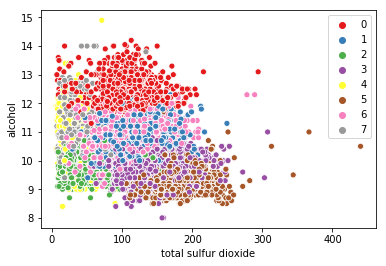

In [45]:
# Môžeme skúsiť vizualizovať vzájomné závislosti atribútov, takých, ktorých popisné charakteristiky sú pre rôzne zhluky rozdielne
# Z vizualizácii vieme potom odhadnúť a popísať niektoré zhluky

import seaborn as sns
g = sns.scatterplot(x='total sulfur dioxide', y='alcohol', hue=y_kmeans, legend='full', data=wines, palette='Set1')